# # Classifiers comparison on texts with naive Bayes assumption

In this session of laboratory we compare two models for categorical data probabilistic modeling: 
1. multivariate Bernoulli 
2. multinomial on a dataset 

We adopt a dataset on Twitter messages labelled with emotions (Joy vs Sadness).

The following cell shows the loading of the data from a fileprogram training a decision tree and its results in preciction 

The following cell shows the loading of the data from a file into a matrix X in a sparse representation.
The dataset is in csv format.
Any Twitter message has been preprocessed by a Natural Language pipeline which eliminated stop words and substituted the interesting document elements with an integer identifier.  
The interesting document elements might be words, emoji or emoticons. The elements could be repeated in the same document and are uniquely identified in the documents by the same integer number.

Each row of the dataset is a list of integer number pairs, followed by a string which is the label of the document (Joy or sadness).
The first number of the pair is an identifier of an element (word, emoji or emoticon) and the second number of the pair is the count (frequency) of that element in that document.

The dataset has:
tot_n_docs=n_rows=11981
n_features (document elements)=11288

The following program reads the data file and loads in a sparse way the matrix using the scipy.sparse library

In [2]:
import itertools
import numpy as np
import scipy
from numpy import ndarray, zeros
from scipy.sparse import csr_matrix

class_labels = ["Joy","Sadness"]
n_features=11288 # number of columns in the matrix = number of features (distinct elements in the documents)
n_rows=11981 # number rows of the matrix
n_elements=71474 # number of the existing values in the matrix (not empty, to be loaded in the matrix in a sparse way)

path_training="./"
file_name="joy_sadness6000.txt"

# declare the row and col arrays with the indexes of the matrix cells (non empty) to be loaded from file
# they are needed because the matrix is sparse and we load in the matrix only the elements which are present
row=np.empty(n_elements, dtype=int)
col=np.empty(n_elements, dtype=int)
data=np.empty(n_elements, dtype=int)

row_n=0 # number of current row to be read and managed
cur_el=0 # position in the arrays row, col and data
twitter_labels=[] # list of class labels (target array) of the documents (twitter) that will be read from the input file
twitter_target=[] # list of 0/1 for class labels
with open(path_training + file_name, "r") as fi:
    for line in fi:
        el_list=line.split(',')
        l=len(el_list)
        last_el=el_list[l-1] # I grab the last element in the list which is the class label
        class_name=last_el.strip() # eliminate the '\n'
        twitter_labels.append(class_name)
        # twitter_labels contains the labels (Joy/Sadness); twitter_target contains 0/1 for the respective labels
        if (class_name==class_labels[0]):
           twitter_target.append(0)
        else:
           twitter_target.append(1)
        i=0 # I start reading all the doc elements from the beginning of the list
        while(i<(l-1)):
            element_id=int(el_list[i]) # identifier of the element in the document
            element_id=element_id-1 # the index starts from 0 (the read id starts from 1)
            i=i+1
            value_cell=int(el_list[i]) # make access to the following value in the file which is the count of the element in the documento 
            i=i+1
            row[cur_el]=row_n # load the data in the three arrays: the first two are the row and col indexes; the last one is the matrix cell value
            col[cur_el]=element_id
            data[cur_el]=value_cell
            cur_el=cur_el+1
        row_n=row_n+1
fi.close
print("final n_row="+str(row))
# loads the matrix by means of the indexes and the values in the three arrays just filled
twitter_data=csr_matrix((data, (row, col)), shape=(n_rows, n_features)).toarray()
print("resulting matrix:")
print(twitter_data)
print(twitter_labels)
print(twitter_target)


final n_row=[0 0 0 ..., 0 0 0]
resulting matrix:
[[1 1 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
['Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Jo

In [4]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(twitter_data, twitter_target, test_size=0.3, random_state=42)

In [7]:
def test_clf(clf, X_train, y_train, X_test, y_test, clf_name=''):
    clf.fit(X_train, y_train)
    print "%s - Accuracy: %s" % (clf_name, clf.score(X_test, y_test))

    # Plot  confusion matrix
    cnf_matrix = confusion_matrix(y_test, clf.predict(X_test))
    class_names = ['Joy','Sadness']
    plt.figure()
    plot_confusion_matrix(cnf_matrix, title = clf_name + ' Confusion matrix', classes=class_names)
    plt.show()

BernoulliNB - Accuracy: 0.934909596662


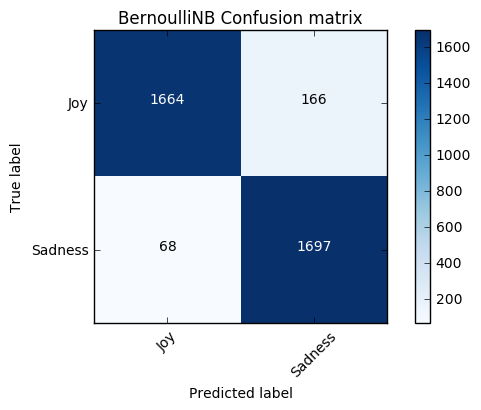

In [82]:
#BernoulliNB
clf = BernoulliNB(alpha = 0, binarize=0.5)
test_clf(clf, X_train, y_train, X_test, y_test, clf_name = 'BernoulliNB')

BernoulliNB with laplace correction - Accuracy: 0.950486787204


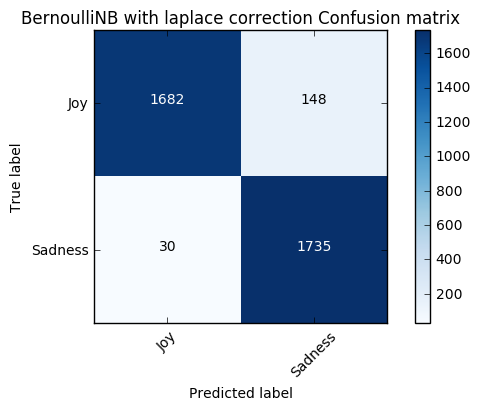

In [84]:
#BernoulliNB with laplace correction
clf = BernoulliNB(alpha = 1, binarize=0.5)
test_clf(clf, X_train, y_train, X_test, y_test, clf_name = 'BernoulliNB with laplace correction')

MultinomialNB - Accuracy: 0.93157162726


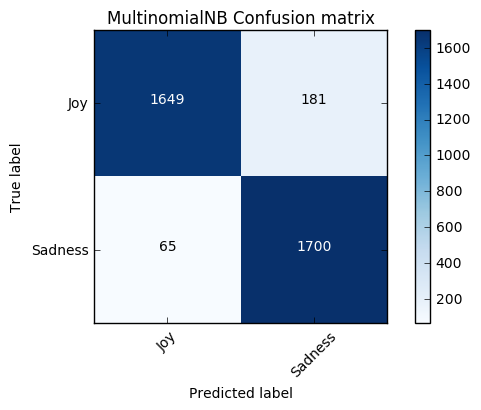

In [81]:
#MultinomialNB
clf = MultinomialNB(alpha = 0)
test_clf(clf, X_train, y_train, X_test, y_test, clf_name = 'MultinomialNB')

MultinomialNB with laplace correction - Accuracy: 0.947148817803


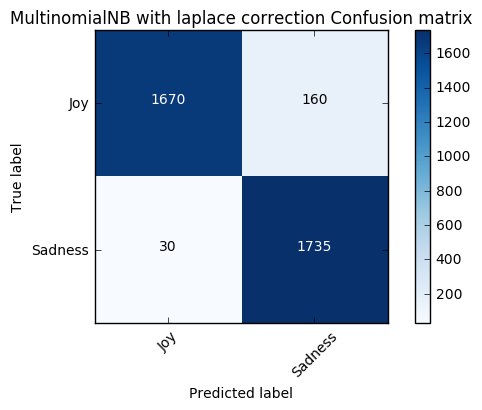

In [86]:
#MultinomialNB with laplace correction
clf = MultinomialNB(alpha = 1)
test_clf(clf, X_train, y_train, X_test, y_test, clf_name = 'MultinomialNB with laplace correction')

GaussianNB - Accuracy: 0.860639777469


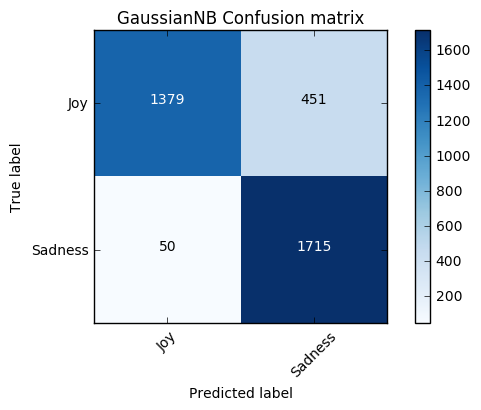

In [8]:
#GaussianNB
clf = GaussianNB()
test_clf(clf, X_train, y_train, X_test, y_test, clf_name = 'GaussianNB')

In [10]:
#As regards Gaussian naive Bayes, for each word/emoji/emoticon learn from the data
#its parameters mean and standard deviation
print "Theta vector: %s" %  np.mean(X_train) #clf.theta_
print "\nStandard deviation: %s" %  np.std(X_train) #clf.sigma_

Theta vector: [[ 0.000481    0.03511304  0.00481    ...,  0.          0.          0.        ]
 [ 0.00047304  0.05842006  0.00331126 ...,  0.00023652  0.00023652
   0.00023652]]

Standard deviation: [[  4.80769777e-04   3.58041125e-02   6.22987076e-03 ...,   6.57803095e-10
    6.57803095e-10   6.57803095e-10]
 [  4.72813791e-04   5.97375234e-02   3.30029450e-03 ...,   2.36463165e-04
    2.36463165e-04   2.36463165e-04]]
